####  NAME :VISHAL KUMAR 
####  THE SPARK FOUNDATION 
#### DATA SCIENCE AND BUSINESS ANALYTICS 
#### TASK 6 :PREDICTION USING DECISION TREE ALGORITHIM 


#### ABOUT
***Iris Dataset is considered as the Hello World for data science. It contains five columns namely – Petal Length, Petal Width, Sepal Length, Sepal Width, and Species Type. Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded them digitally.***

1. sepal length in cm 
2. sepal width in cm
3. petal length in cm 
4. petal width in cm 
5. class
 -- Iris Setosa 
 -- Iris Versicolour
 -- Iris Virginica 



#### LIBRARIES

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
from IPython.display import Image
Image(url= "iris-dataset.png", width=800, height=800)

In [3]:
dataset=pd.read_csv("Iris.csv")

#### TO VIEW 1ST 5 ROWS OF DATASET

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.shape

(150, 6)

#### THE ABOVE DATASET CONTAINS 150 ROW AND 6 COLOUMNS

In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### CHECKING FOR NULL VALUES

In [7]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### WE FIND THAT ID COLOUMN IS REDUDUCTANT WITH COLOUMN 2 SO WE WILL DROP IT

In [9]:
dataset=dataset.drop(columns=["Id"])

In [10]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### DATASET VISUALIZATION

#### HISTOGRAM FOR THE PETALS DETAILS 

Text(0, 0.5, 'Number')

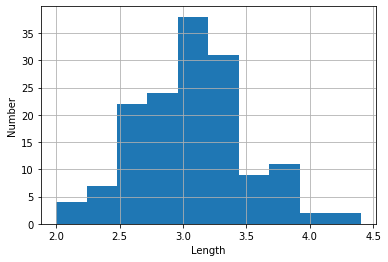

In [19]:
dataset["SepalWidthCm"].hist()
plt.xlabel('Length') 
plt.ylabel('Number')

<AxesSubplot:>

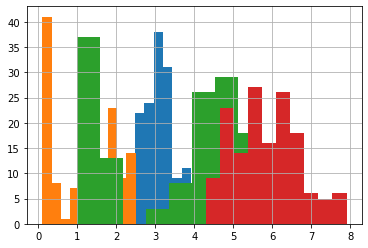

In [21]:
dataset["SepalWidthCm"].hist()
dataset["PetalWidthCm"].hist()
dataset["PetalLengthCm"].hist()
dataset["SepalLengthCm"].hist()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

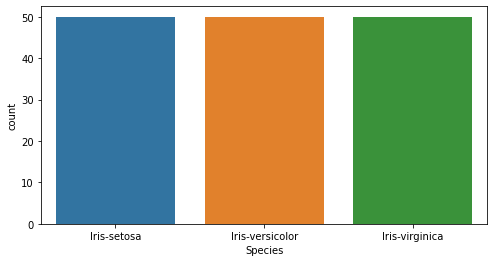

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(dataset.Species)

#### PAIR PLOT FOR DATASET

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


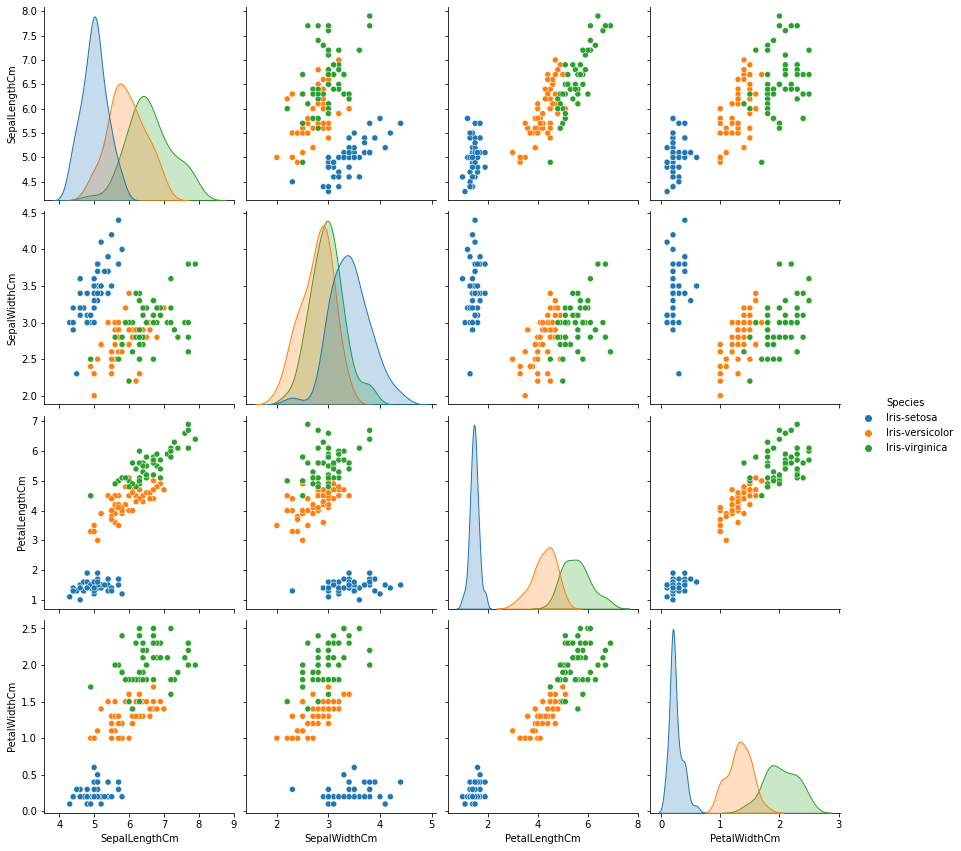

In [22]:
colors=['red','green','orange']
sns.pairplot(dataset,hue='Species',size=3)

#### TO SHOW THE DISTRIBUTION OF PETALS IN SPECIES

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

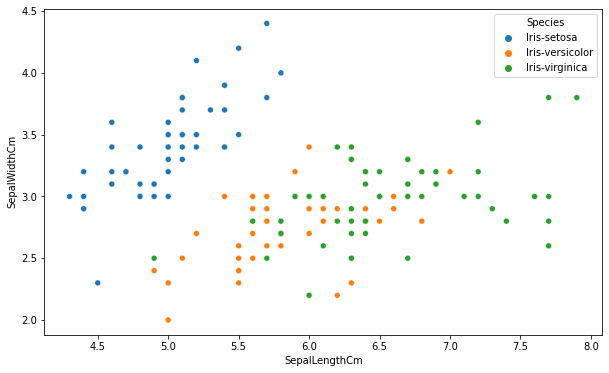

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=dataset)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

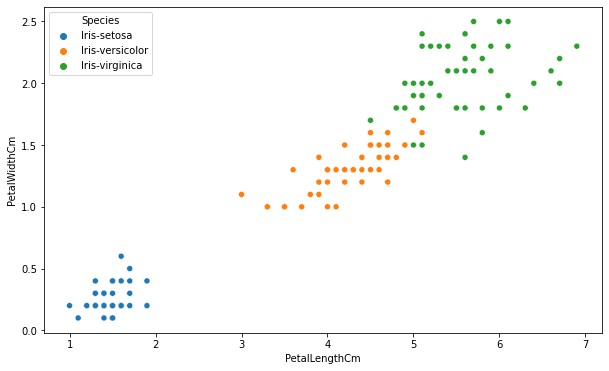

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=dataset)


#### PREPARING THE DATASET FOR THE TRAINING 

#### FEATURE MATRIX

In [25]:
X=dataset.iloc[:,0:4]

In [26]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### OUTPUT CLASS

In [27]:
Y=dataset.iloc[:,4]

In [28]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

#### ENCODING USING LABELENCODINER

#### Encode target labels with value between 0 and n_classes-1.

In [29]:
labelen=LabelEncoder()
Y=labelen.fit_transform(Y)

In [30]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### SPLITTING DATASET INTO TRAINING DATA AND TESTING DATA USING train_test_split LIBRARY

In [31]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.5,random_state=5)

In [32]:
Xtrain

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
95,5.7,3.0,4.2,1.2
139,6.9,3.1,5.4,2.1
76,6.8,2.8,4.8,1.4
32,5.2,4.1,1.5,0.1
101,5.8,2.7,5.1,1.9
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [33]:
Ytrain

array([1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1,
       0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0,
       1, 2, 0, 2, 0, 1, 2, 2, 1])

In [34]:
Xtest

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
114,5.8,2.8,5.1,2.4
42,4.4,3.2,1.3,0.2
109,7.2,3.6,6.1,2.5
...,...,...,...,...
136,6.3,3.4,5.6,2.4
94,5.6,2.7,4.2,1.3
127,6.1,3.0,4.9,1.8
87,6.3,2.3,4.4,1.3


In [35]:
Ytest

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 1])

In [36]:
Ytrain

array([1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1,
       0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0,
       1, 2, 0, 2, 0, 1, 2, 2, 1])

#### FINDING THE CORRELATION BETWEEN PETAL LENGTH

In [37]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### PLOTTING THE HEATMAP

<AxesSubplot:>

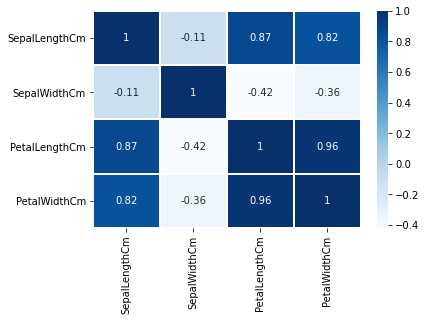

In [38]:
corr=dataset.corr()
sns.heatmap(corr,annot=True, cmap="Blues",linewidths=1)

#### CREATING MODEL USING DECISION TREE ALGORITHIM

In [39]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

#### FITTING THE TRAINING DATA INTO THE MODEL

In [40]:
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

#### EVALUATION OF MODELS

#### SCORE

In [41]:
model.score(Xtest,Ytest)

0.9466666666666667

In [42]:
Ypredict=model.predict(Xtest)

#### PREDICTION

In [43]:
Ypredict

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1,
       0, 2, 2, 1, 2, 1, 2, 1, 1])

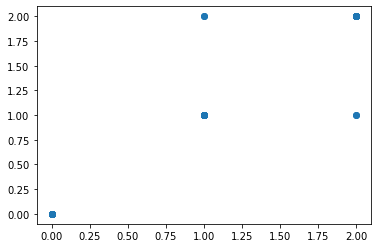

In [50]:

plt.scatter(Ypredict,Ytest)

#### CONFUSION MATRIX

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,Ypredict)
print(cm)

[[22  0  0]
 [ 0 27  2]
 [ 0  2 22]]


<AxesSubplot:>

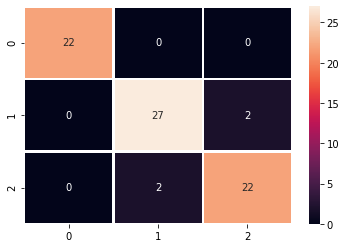

In [55]:
sns.heatmap(cm,annot=True,linewidth=1.5)

#### ACCURACY SCORE

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest,Ypredict)

0.9466666666666667

In [57]:
from IPython.display import Image
Image(url= "dec.jpg", width=500, height=500)